# Ön Hazırlık LAB-4

## Ad Soyad: Selin Ünlü

## Öğrenci No: 161024016

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.signal as sgnl
%matplotlib notebook

###### 3.2 Basit Kesirlere Ayırma

###### Örnek-7:(Example 3.9)

In [2]:
z = np.array([0])
p = np.array([1.0/4, 1.0/2])
b, a =sgnl.zpk2tf(z, p, 1)
b,a

(array([1., 0.]), array([ 1.   , -0.75 ,  0.125]))

In [3]:
a = sgnl.convolve(np.array([1, -1/4]), np.array([1, -1/2]))
a

array([ 1.   , -0.75 ,  0.125])

In [4]:
r, p, k = sgnl.residuez(b,a)
print(r, p, k)
# r : the numerator of each term
# p : the poles of the system
# k : the polynomial term(if any)
poles = np.roots(a)
poles

[-1.  2.] [0.25 0.5 ] [0.]


array([0.5 , 0.25])

###### 3.3 Kuvvet Serisine Açma

###### Örnek-8:

In [5]:
num = np.array([1, 0, 0])
denum = np.array([1, -3.0/4, 1.0/8])

n,x = sgnl.dimpulse((num, denum, 1), x0 = 0, n = 10)   # x0 : initial state
print(np.squeeze(x))

[1.         0.75       0.4375     0.234375   0.12109375 0.06152344
 0.03100586 0.01556396 0.00779724 0.00390244]


<StemContainer object of 3 artists>

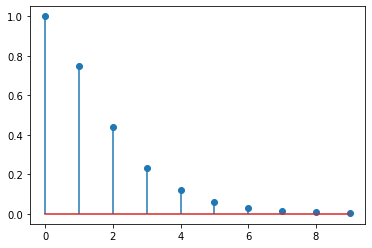

In [6]:
plt.stem(n, np.squeeze(x), use_line_collection = True)

###### Örnek-9:

In [7]:
n = np.arange(0, 10 ,1)
xpf = -(1.0/4)**n + 2*(1.0/2)**n

num = np.array([1, 0, 0])
denum = np.array([1, -3.0/4, 1.0/8])

n1, xpse = sgnl.dimpulse((num, denum, 1), x0 = 0, n=10)
xpse = np.squeeze(xpse)

Text(0.5, 0, 'index vector (sample)')

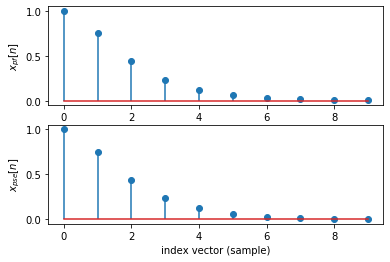

In [8]:
plt.subplot(2, 1, 1)
plt.stem(n, xpf, use_line_collection = True)
plt.ylabel('$x_{pf}[n]$')

plt.subplot(2, 1, 2)
plt.stem(n, xpse, use_line_collection = True)
plt.ylabel('$x_{pse}[n]$')

plt.xlabel('index vector (sample)')

###### Örnek-10:

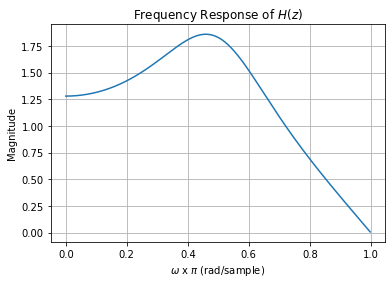

In [9]:
zeros = np.array([-1])
poles = np.array([-1j/2, 1j/2, -1.0/4])

w,H = sgnl.freqz_zpk(zeros, poles, 1)

plt.plot(w/np.pi, abs(H))

plt.title('Frequency Response of $H(z)$')
plt.ylabel('Magnitude')
plt.xlabel('$\omega$ x $\pi$ (rad/sample)')
plt.grid()

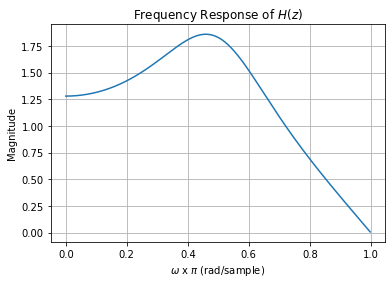

In [10]:
num , denum =sgnl.zpk2tf(zeros, poles, 1)

w1, H_tf = sgnl.freqz(num, denum)

plt.figure()
plt.plot(w1/np.pi, abs(H_tf))

plt.title('Frequency Response of $H(z)$')
plt.ylabel('Magnitude')
plt.xlabel('$\omega$ x $\pi$ (rad/sample)')
plt.grid()

<StemContainer object of 3 artists>

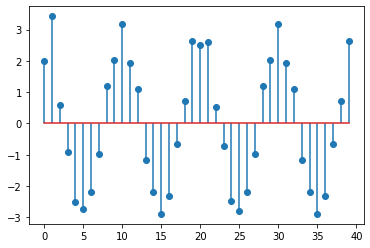

In [11]:
n = np.arange(0, 40, 1)
xn = 2*np.cos(0.2*np.pi*n) + np.sin(0.9*np.pi*n)

yn = sgnl.lfilter(num, denum, xn)
plt.figure()
plt.stem(n, yn, use_line_collection = True)

###### Örnek-11:

In [12]:
# coding: utf-8

# In[ ]:

# Copyright (c) 2020 Hasan Huseyin Sonmez
#
# The following code implements a pole-zero diagram for discrete-time signal/systems
# It has been written to mimic the "zplane" function of Mathworks' MATLAB software.
# it is aimed as a supplementary tool to be used in
# ELM368 Fundamentals of Digital Signal Processing-laboratory course.
# Gebze Technical University, Kocaeli, Turkey
#
# The function parameters are:
#     Input:
#            b : the numerator coefficients of the discrete-time signal/system
#            a : the denominator coefficients of the discrete-time signal/system
#


# In[29]:

# import the necessary libraries
import numpy as np              # for using basic array functions
import matplotlib.pyplot as plt # for this example, it may not be necessary

# the main package for signal processing is called "scipy" and we will use "signal" sub-package
import scipy.signal as sgnl 
# alternative syntax: from scipy import signal as sgnl

def zplane(b,a):

	# Input: numerator and denominator coefficients:
	zeross,poless,k = sgnl.tf2zpk(b, a)
	if not zeross.size:
		zeross = np.zeros(len(poless))
		
	if not poless.size:
		poless = np.zeros(len(zeross))

	tol = 1e-4

	real_p = np.real(poless).copy()
	real_z = np.real(zeross).copy()
	imag_p = np.imag(poless).copy()
	imag_z = np.imag(zeross).copy()

	if not real_z.size:
		real_z[abs(real_z) < tol] = 0
	if not imag_z.size:
		imag_z[abs(imag_z) < tol] = 0
	if not real_p.size:
		real_p[abs(real_p) < tol] = 0
	if not imag_p.size:
		imag_p[abs(imag_p) < tol] = 0

	z = np.round(real_z,2) + 1j*np.round(imag_z,2)
	p = np.round(real_p,2) + 1j*np.round(imag_p,2)

	# plot the unit circle
	N = 128
	m = np.arange(0,N,1)
	unitCircle = np.exp(1j*m*2*np.pi/N)

	plt.figure()
	plt.plot(np.real(unitCircle), np.imag(unitCircle), 'b--', linewidth=0.3)
	plt.xlabel('Real Part'), plt.ylabel('Imaginary Part')

	# calculate the plot limits
	Cz, z_counts = np.unique(z, return_counts=True)
	Cp, p_counts = np.unique(p, return_counts=True)

	zz = [idx1 for idx1, valz in enumerate(z_counts) if valz > 1]
	pp = [idx2 for idx2, valp in enumerate(p_counts) if valp > 1]
	zval = z_counts[zz]
	pval = p_counts[pp]
	zs = Cz[zz]
	ps = Cp[pp]

	real_roots = np.concatenate((np.real(p),np.real(z)))
	imag_roots = np.concatenate((np.imag(p),np.imag(z)))

	# adjust plot limits
	xlower = min(-1, min(real_roots)) - 0.3
	xupper = max(1,  max(real_roots)) + 0.3
	ylower = min(-1, min(imag_roots)) - 0.3
	yupper = max(1,  max(imag_roots)) + 0.3
	plt.xlim(xlower, xupper), plt.ylim(ylower, yupper)

	# plot axes
	Xaxis = np.arange(xlower, xupper, 0.1)
	Yaxis = np.arange(ylower, yupper, 0.1)
	plt.plot(np.real(Xaxis), np.imag(Xaxis), 'b--', linewidth=0.3)
	plt.plot(np.imag(Yaxis), np.real(Yaxis), 'b--', linewidth=0.3)

	# plot poles and zeros
	plt.plot(np.real(z), np.imag(z), 'ro',  markerfacecolor = 'none')
	plt.plot(np.real(p), np.imag(p), 'rx')

	if zz:
		txtz = str(zval)[1:-1]
		plt.annotate(txtz, xy=(np.real(zs)+0.1,np.imag(zs)+0.1))
		
	if pp:
		txtp = str(pval)[1:-1]
		plt.annotate(txtp, xy=(np.real(ps)+0.1,np.imag(ps)+0.1))

	plt.grid()
	plt.show()


# In[ ]:

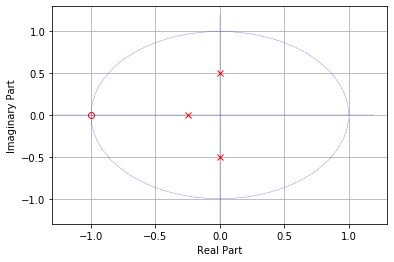

In [13]:
zeros = np.array([-1])
poles = np.array([-1j/2, 1j/2, -1/4])

k=1

b, a = sgnl.zpk2tf(zeros, poles, k) 
zplane(b,a)

<Figure size 432x288 with 0 Axes>

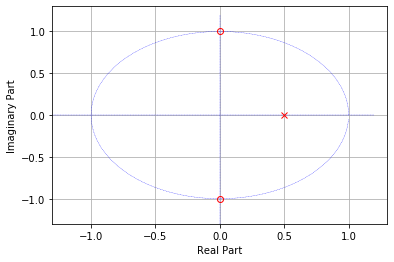

In [14]:
num = np.array([1, 0, 1])
denum = np.array([1, -1.0/2])

plt.figure()
zplane(num, denum)

Text(0.5, 0, '$\\omega$ x$\\pi$ rad/sample')

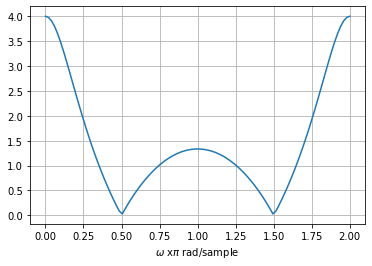

In [15]:
w = np.linspace(0, 2*np.pi, 100)

Hw = (1 + np.exp(-2*1j*w)) / (1 - (1/2)*np.exp(-1j*w))

Hw_abs = abs(Hw)

plt.figure()
plt.plot(w/np.pi, Hw_abs)
plt.grid()
plt.xlabel('$\omega$ x$\pi$ rad/sample')

# SORU-1

### a) 

###### y[n] - 1/2y[n-1] + 4y[n-2] - 2y[n-3] = x[n] + 2/3x[n-1] + 1/9x[n-2]

###### Y(z) - 1/2 z^-1 Y(z) + 4 z^-2 Y(z) - 2 z^-3 Y(z) = X(z) + 2/3 z^-1 X(z) + 1/9 z^-2 X(z)

###### Y(z) (1  -  1/2 z^-1  +  4 z^-2  -  2 z^-3)  =  X(z) (1 +  2/3 z^-1  +  1/9 z^-2)

###### H(z) = Y(z)/X(z) = (1 +  2/3 z^-1  +  1/9 z^-2)  /  (1  -  1/2 z^-1  +  4z^-2  -  2z^-3)

### b) 

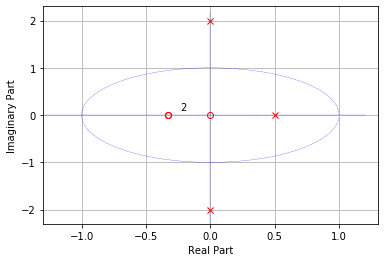

In [16]:
zeros = np.array([-1/3, -1/3, 0])
poles = np.array([1j*(-2), 1j*2, 1/2])

k=1

b, a = sgnl.zpk2tf(zeros, poles, k) 
zplane(b,a)

### c) 

### c.1.     h[n] = 0, n<0 işaretin sağ yanlı yani nedensel olduğunu söylemektedir. Bu da ROC'un dışa doğru olduğu anlamına gelir. ROC'un kutup içeremeyeceğini de göz önünde bulundurulduğunda:   ROC : |z|>2 

### c.2. Sistemin Fourier dönüşümü, ancak ve ancak ROC birim çemberi içeriyorsa vardır. Yani sistem kararlıysa vardır. Yine ROC'un kutup içeremeyeceği göz önünde bulundurulduğunda:   ROC : 1/2 < |z| < 2 

### d) 

In [17]:
num = np.array([1, 2/3, 1/9])
denum = np.array([1, -1/2, 4, -2])

n,x = sgnl.dimpulse((num, denum, 1), x0 = 0, n = 10)   # x0 : initial state
print(np.squeeze(x))

[  0.           1.           1.16666667  -3.30555556  -4.31944444
  13.39583333  17.36458333 -53.53993056 -69.43663194 214.17057292]


<StemContainer object of 3 artists>

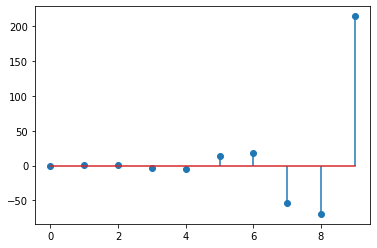

In [18]:
plt.stem(n, np.squeeze(x), use_line_collection = True)

### h[n]'de n değeri arttıkça genlik değerleri giderek arttığı için yani mutlak toplanabilir olmadığı için sistem kararlı değildir.

### e)

### Eğer bir sistemin nedensel olmasını istiyorsak h[n]'in n değerleri arttıkça genlik değerleri azalması yani mutlak toplanabilir olması gerekir.  ROC üzerinden düşünecek olursak ROC dışa doğrudur. Eğer ROC birim çemberi içerirse de kararlıdır. Bu iki şartı sağladığı zaman aynı anda hem nedensel hem de kararlı olur.  

### Bu sistemin kararlı olması için ROC birim çemberin olduğu 0.5 < |z| < 2 bölgesinde olmalıdır. Yani çift yanlı. Bu durumda ROC dışa doğru olamadığı için nedensel değildir. Yani bu sistem aynı anda hem nedensel hem kararlı olamıyor.

### Sistemin nedensel olabilmesi sistem fonksiyonunu için (2j) ve (-2j) kutuplarından kurtarmamız gerekir ki ROC dışa doğru olsun. Yani sistem nedensel olsun. Bunun için bu sistemi H2=z^2+4 sistemiyle cascade bağlamamız gerekir.

### H(z)  = (1 +  2/3 z^-1  +  1/9 z^-2)  /  (1  -  1/2 z^-1  +  4z^-2  -  2z^-3)  = ((z + 1/3)^2) z / (z-1/2)(z^2+4)

### H2(z)= (z^2+4)

### H(z)H2(z) = ((z + 1/3)^2) z / (z-1/2) olur ve sistem artık sağ yanlıdır. Yani nedenseldir. Böylece bu sistem hem nedensel hem de kararlı oldu. (ROC: |z|>0.5)

### f) 

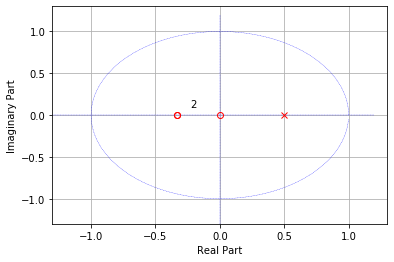

In [27]:
zeros = np.array([-1/3, -1/3, 0])
poles = np.array([1/2])

k=1

b, a = sgnl.zpk2tf(zeros, poles, k) 
zplane(b,a)

In [28]:
num , denum =sgnl.zpk2tf(zeros, poles, 1)
w1, H_tf = sgnl.freqz(num, denum)

<StemContainer object of 3 artists>

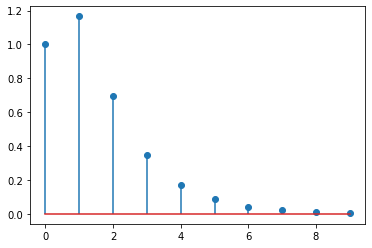

In [29]:
dirac = sgnl.unit_impulse(10)
y = sgnl.lfilter(num, denum, dirac)

plt.stem(n, y, use_line_collection = True)

### Kutup - Sıfır diyagramına baktığımızda kutbumuzun 1/2 değerinde yani reel eksen üzerinde ve mutlak değeri 1'den küçük yani birim çember içerisinde olduğu için h[n] (dürtü cevabı) şekildeki gibi bulunur.

### g) 

### Bu bir alçak geçiren filtre olup kesim frekansı(cut-off) = 1/$\pi$ (rad/sample)

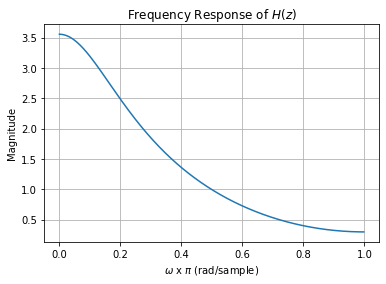

In [30]:
num , denum =sgnl.zpk2tf(zeros, poles, 1)

w1, H_tf = sgnl.freqz(num, denum)

plt.figure()
plt.plot(w1/np.pi, abs(H_tf))

plt.title('Frequency Response of $H(z)$')
plt.ylabel('Magnitude')
plt.xlabel('$\omega$ x $\pi$ (rad/sample)')
plt.grid()